In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
# importado o gerados de dados
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer



# importing libraries
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

In [2]:
# preparando o plot em 3-D
from mpl_toolkits.mplot3d import Axes3D

# preparando o tamanho do plot
plt.rcParams['figure.figsize'] = (20, 14)

In [3]:

# Criando um sample dataset com 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4, random_state=123)

In [4]:
# verificando o tamanho dos dados
X.shape,y.shape

((800, 3), (800,))

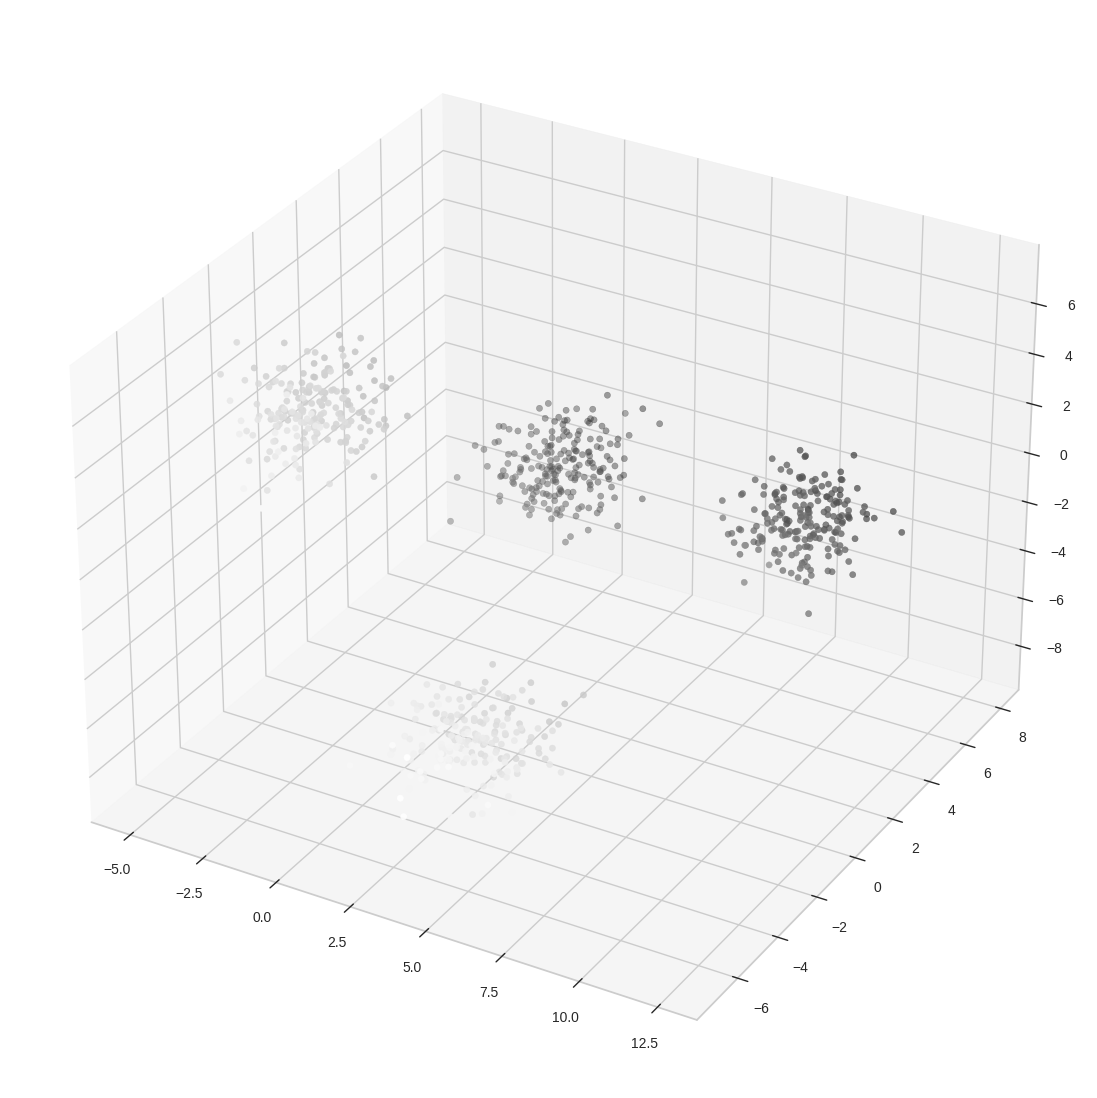

In [5]:
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=y, marker='o')


In [6]:

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [7]:
C

array([[ 3.92641951, -4.32154363, -5.42941397],
       [ 0.97539985,  4.3661875 , -1.61345723],
       [-2.10872876, -3.06868236,  4.66812604],
       [ 9.59804372,  3.64965739, -0.36885258]])

In [8]:
type(X)

numpy.ndarray

In [9]:
x_df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

In [10]:
x_df

,X,Y,Z
0,9.160321,2.900349,-1.177992
1,1.789456,2.581758,-1.851945
2,10.491610,4.233840,-0.269436
3,-2.706095,-1.693681,5.635382
4,1.017393,4.967173,-1.707615
...,...,...,...
795,5.713741,-2.689145,-5.350327
796,1.696808,4.061615,-0.525003
797,8.646339,4.297642,-1.302646
798,3.680728,-4.946860,-5.476575


In [11]:
x_df.describe()

,X,Y,Z
count,800.000000,800.000000,800.000000
mean,3.097784,0.156405,-0.685899
std,4.435994,4.008409,3.731158
min,-5.077679,-6.908651,-8.694026
25%,-0.703785,-3.604171,-3.710796
50%,2.435475,-0.421513,-0.937558
75%,7.031799,4.066675,1.751195
max,12.465992,7.960959,7.168003


In [12]:
x_df['clusters'] = labels
x_df

,X,Y,Z,clusters
0,9.160321,2.900349,-1.177992,3
1,1.789456,2.581758,-1.851945,1
2,10.491610,4.233840,-0.269436,3
3,-2.706095,-1.693681,5.635382,2
4,1.017393,4.967173,-1.707615,1
...,...,...,...,...
795,5.713741,-2.689145,-5.350327,0
796,1.696808,4.061615,-0.525003,1
797,8.646339,4.297642,-1.302646,3
798,3.680728,-4.946860,-5.476575,0


In [13]:
cluster0 = x_df[ x_df['clusters'] == 0 ]
cluster1 = x_df[ x_df['clusters'] == 1 ]

In [14]:
cluster0.describe()

,X,Y,Z,clusters
count,200.000000,200.000000,200.000000,200.0
mean,3.926420,-4.321544,-5.429414,0.0
std,1.082635,1.010799,0.892866,0.0
min,1.130795,-6.908651,-8.694026,0.0
25%,3.236415,-5.041330,-6.017122,0.0
50%,3.799924,-4.293857,-5.379492,0.0
75%,4.579298,-3.595085,-4.788041,0.0
max,6.888009,-1.717363,-3.406504,0.0


In [15]:
cluster1.describe()

,X,Y,Z,clusters
count,200.000000,200.000000,200.000000,200.0
mean,0.975400,4.366187,-1.613457,1.0
std,1.042081,1.024884,0.899910,0.0
min,-2.140760,1.594907,-3.819623,1.0
25%,0.386528,3.670038,-2.230948,1.0
50%,0.980734,4.353423,-1.635112,1.0
75%,1.709408,4.946498,-0.901976,1.0
max,3.792898,7.960959,0.194091,1.0


In [16]:
C

array([[ 3.92641951, -4.32154363, -5.42941397],
       [ 0.97539985,  4.3661875 , -1.61345723],
       [-2.10872876, -3.06868236,  4.66812604],
       [ 9.59804372,  3.64965739, -0.36885258]])

In [17]:
labels

array([3, 1, 3, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 3, 2, 0, 2, 0, 1, 0, 0,
       3, 1, 3, 3, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 3, 1, 1, 1, 2, 0, 0,
       2, 0, 3, 3, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 3, 0, 2, 2, 0, 3, 2,
       2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 3, 3, 0, 3, 2, 3, 3, 2, 0, 1, 1, 0,
       0, 3, 0, 2, 0, 2, 1, 1, 0, 3, 3, 0, 2, 3, 2, 1, 0, 3, 2, 2, 0, 1,
       0, 1, 2, 3, 2, 0, 1, 3, 2, 0, 0, 2, 0, 1, 3, 1, 2, 3, 3, 3, 2, 1,
       3, 0, 1, 0, 3, 1, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 0, 3, 3, 3,
       3, 3, 1, 2, 3, 0, 0, 2, 1, 3, 1, 0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 2,
       1, 1, 0, 1, 0, 0, 1, 2, 3, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2, 1, 1, 0,
       1, 2, 3, 2, 1, 0, 0, 3, 0, 1, 3, 3, 2, 1, 2, 0, 0, 3, 1, 1, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 3, 2, 3, 0, 3, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0,
       3, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 3, 2, 2, 1, 1, 3, 2, 3, 3, 1,
       0, 3, 0, 0, 1, 0, 1, 2, 0, 2, 1, 3, 1, 0, 3, 0, 0, 2, 2, 1, 0, 3,
       3, 0, 3, 2, 2, 2, 2, 2, 0, 3, 1, 3, 1, 2, 3,

Cluster  1
[ 3.92641951 -4.32154363 -5.42941397]
Cluster  2
[ 0.97539985  4.3661875  -1.61345723]
Cluster  3
[-2.10872876 -3.06868236  4.66812604]
Cluster  4
[ 9.59804372  3.64965739 -0.36885258]


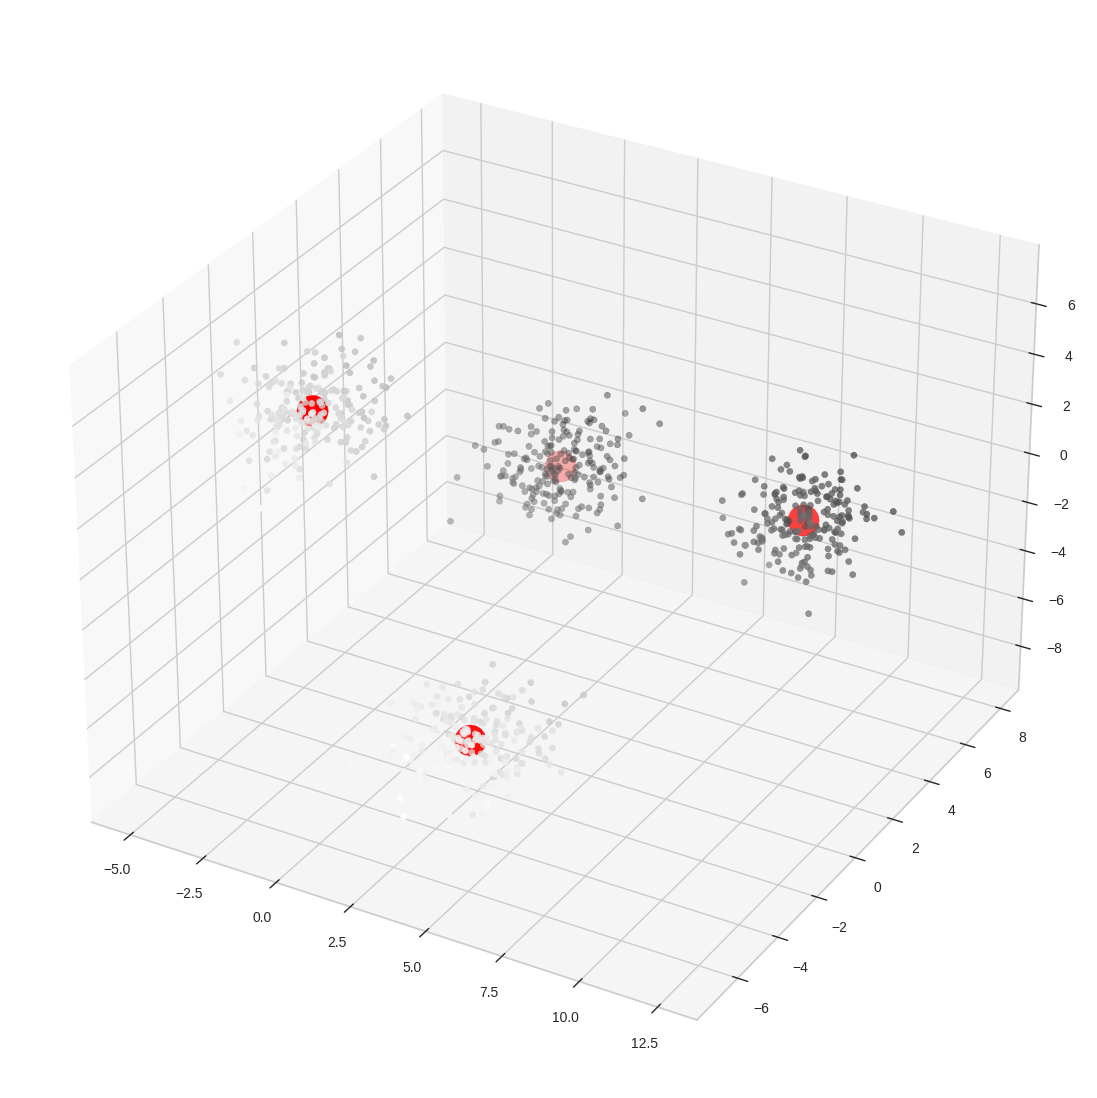

In [18]:
# plotando os clusters em 3-D
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=y, marker='o');

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c='red', s=500)
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

1 39683.87351162204
2 22037.32785362758
3 9913.518408958907
4 2272.2740654943464
5 2124.916646875915
6 1961.143065686121
7 1830.5461241688306
8 1737.3026167297403
9 1629.3399220492247
10 1511.2468202865527


Text(0, 0.5, 'WSS')

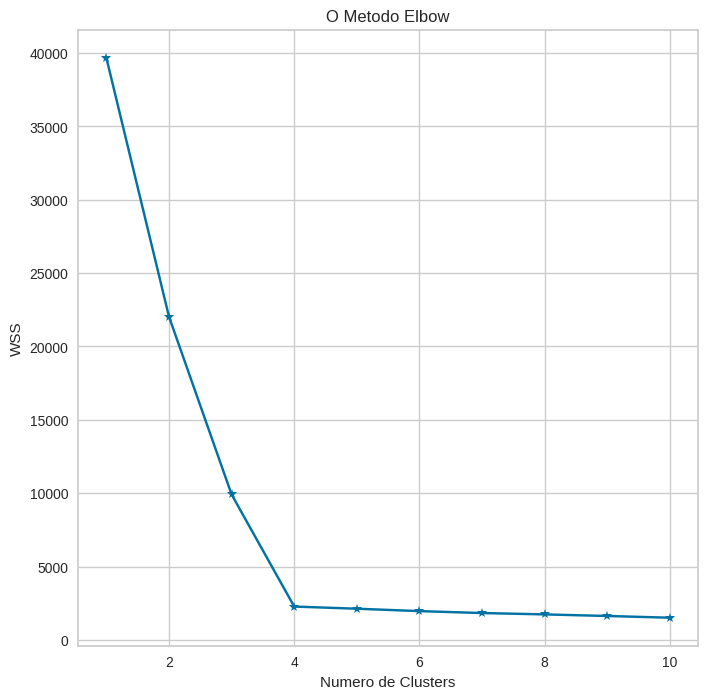

In [19]:
plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,'*-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

In [20]:

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

In [21]:
# k_max = 0
# x_max = 0
# for c, x in zip(n_cluster_list, sillhoute_scores):
#   if x > x_max:
#     x_max = x
#     k_max = c
# print(k_max,x_max)

#or in one line code
k_max, x_max = max(zip(n_cluster_list, sillhoute_scores), key=lambda x: x[1])
print(k_max,x_max)

4 0.7654794562863085


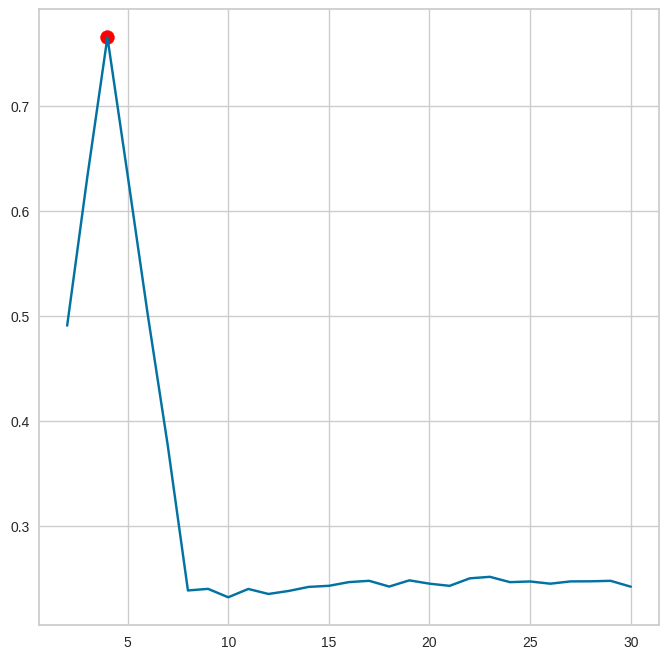

In [22]:
plt.figure(figsize=(8,8))
plt.plot(n_cluster_list,sillhoute_scores)
plt.scatter(k_max, x_max, color='red', s = 100)
plt.show()

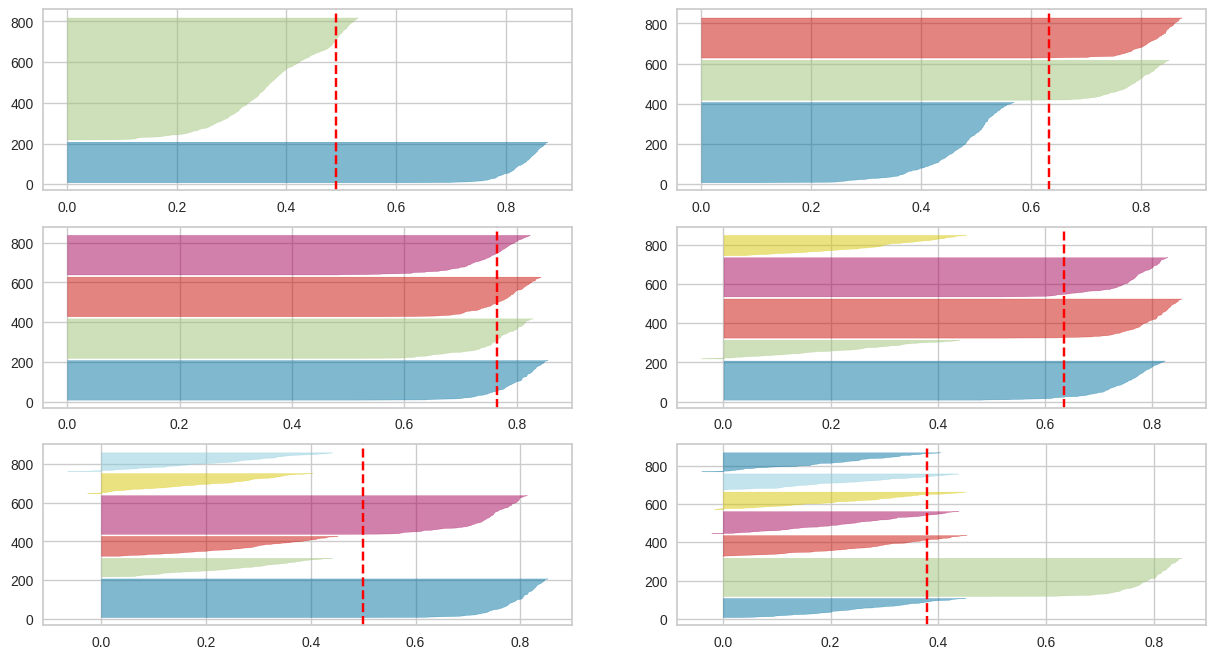

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)